<a href="https://colab.research.google.com/github/ethanmarshallanalytics/Object-Detection-YOLOv8/blob/main/Project_Testing_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/project_folder
! ls

/content/drive/MyDrive/project_folder
 annotated    'old versions'		'Project Testing v3.ipynb'   train	      yolov8n.pt
 config.yaml  'Project Data v5.ipynb'	 runs			     valid
 kits19       'Project Slides.gslides'	 test			     visualizations


In [ ]:
!pip install ultralytics
!pip install squarify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 4.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Subset
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, random_split
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
!nvidia-smi

Sat Apr 13 20:17:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0              24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Using device:', device)

Using device: cpu


In [ ]:
model = YOLO("yolov8n.yaml")

In [ ]:
results = model.train(data = "/content/drive/MyDrive/project_folder/config.yaml", seed=42, epochs=50, lr0=0.001)

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/project_folder/config.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

100%|██████████| 755k/755k [00:00<00:00, 19.0MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/.shortcut-targets-by-id/1HYs_H2Rdh45csuTtATRlA7BMqJiWKVI8/project_folder/train/labels... 1387 images, 64 backgrounds, 0 corrupt: 100%|██████████| 1387/1387 [01:43<00:00, 13.42it/s]


train: New cache created: /content/drive/.shortcut-targets-by-id/1HYs_H2Rdh45csuTtATRlA7BMqJiWKVI8/project_folder/train/labels.cache


val: Scanning /content/drive/.shortcut-targets-by-id/1HYs_H2Rdh45csuTtATRlA7BMqJiWKVI8/project_folder/valid/labels... 175 images, 9 backgrounds, 0 corrupt: 100%|██████████| 175/175 [01:56<00:00,  1.51it/s]

val: New cache created: /content/drive/.shortcut-targets-by-id/1HYs_H2Rdh45csuTtATRlA7BMqJiWKVI8/project_folder/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      3.615       4.62      3.898         29        640: 100%|██████████| 87/87 [01:37<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        175        355          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G        2.8      3.587      2.852         31        640: 100%|██████████| 87/87 [01:36<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.04s/it]

                   all        175        355      0.013      0.227     0.0108    0.00628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      2.155      2.568      2.317         46        640: 100%|██████████| 87/87 [01:36<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        175        355      0.391      0.193      0.254      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.698      1.953      1.928         26        640: 100%|██████████| 87/87 [01:35<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        175        355      0.398      0.324      0.371      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.414      1.554      1.685         30        640: 100%|██████████| 87/87 [01:36<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]

                   all        175        355      0.482      0.374      0.426      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.333      1.404      1.599         22        640: 100%|██████████| 87/87 [01:34<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.34it/s]

                   all        175        355      0.486      0.483      0.439      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.194      1.284      1.498         23        640: 100%|██████████| 87/87 [01:34<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.39it/s]

                   all        175        355      0.862      0.135      0.174      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.123      1.168      1.409         43        640: 100%|██████████| 87/87 [01:37<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]

                   all        175        355      0.481      0.464      0.458      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.106      1.109        1.4         39        640: 100%|██████████| 87/87 [01:36<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]

                   all        175        355      0.483        0.5      0.438      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.043      1.051      1.351         32        640: 100%|██████████| 87/87 [01:34<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.31it/s]

                   all        175        355      0.597        0.5      0.481      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.018      1.015      1.326         44        640: 100%|██████████| 87/87 [01:35<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        175        355      0.725      0.509      0.559      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.9742     0.9437      1.278         40        640: 100%|██████████| 87/87 [01:35<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.01it/s]

                   all        175        355      0.582      0.549      0.479       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.9594     0.9309      1.284         34        640: 100%|██████████| 87/87 [01:37<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        175        355      0.712      0.544      0.586      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.9468     0.9003      1.264         41        640: 100%|██████████| 87/87 [01:33<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]

                   all        175        355      0.732      0.513        0.6      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.9085     0.8271      1.231         21        640: 100%|██████████| 87/87 [01:35<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]

                   all        175        355      0.408      0.384      0.317      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.8915      0.801      1.219         20        640: 100%|██████████| 87/87 [01:35<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        175        355      0.595      0.574      0.535       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.8739     0.7819      1.209         33        640: 100%|██████████| 87/87 [01:33<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]

                   all        175        355       0.62      0.556      0.546       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.8534     0.7518      1.184         29        640: 100%|██████████| 87/87 [01:33<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.20it/s]

                   all        175        355      0.622      0.534      0.517      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.8463     0.7335      1.198         37        640: 100%|██████████| 87/87 [01:34<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        175        355      0.707      0.519      0.547      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.8404     0.7085      1.179         34        640: 100%|██████████| 87/87 [01:36<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        175        355      0.679      0.563      0.586      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.8343      0.701      1.177         32        640: 100%|██████████| 87/87 [01:34<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.34it/s]

                   all        175        355      0.773      0.549      0.604      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.8168     0.6986      1.163         34        640: 100%|██████████| 87/87 [01:35<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.06it/s]

                   all        175        355      0.685      0.552      0.535       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      0.785     0.6481      1.142         24        640: 100%|██████████| 87/87 [01:33<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        175        355      0.809      0.583      0.635      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.7919     0.6601      1.154         28        640: 100%|██████████| 87/87 [01:33<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        175        355      0.693      0.573       0.56      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.7869     0.6415      1.139         35        640: 100%|██████████| 87/87 [01:35<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.35it/s]

                   all        175        355      0.686      0.545      0.589      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.7488     0.6044      1.108         37        640: 100%|██████████| 87/87 [01:35<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        175        355      0.744       0.57      0.614      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.7365     0.5857      1.105         31        640: 100%|██████████| 87/87 [01:34<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        175        355      0.569      0.302      0.325      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.7523     0.6031      1.117         39        640: 100%|██████████| 87/87 [01:35<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.44it/s]

                   all        175        355      0.472      0.218      0.149      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.7277     0.5783      1.102         40        640: 100%|██████████| 87/87 [01:35<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        175        355      0.774      0.572      0.613      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.7162     0.5858      1.111         27        640: 100%|██████████| 87/87 [01:37<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.28s/it]

                   all        175        355      0.762      0.569      0.583      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.7119     0.5672      1.093         26        640: 100%|██████████| 87/87 [01:33<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.42it/s]

                   all        175        355      0.702      0.547      0.565      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.7033     0.5514      1.085         22        640: 100%|██████████| 87/87 [01:34<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.09it/s]

                   all        175        355      0.653      0.544      0.591      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.7083     0.5464      1.094         25        640: 100%|██████████| 87/87 [01:34<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        175        355       0.56      0.498      0.466      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.6842     0.5265       1.08         32        640: 100%|██████████| 87/87 [01:35<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.31it/s]

                   all        175        355      0.746      0.564      0.596       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.6747     0.5266      1.075         23        640: 100%|██████████| 87/87 [01:34<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        175        355      0.783      0.566      0.603      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.6751      0.523      1.073         29        640: 100%|██████████| 87/87 [01:34<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        175        355      0.658      0.569      0.557      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      0.666      0.511      1.063         42        640: 100%|██████████| 87/87 [01:33<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.04s/it]

                   all        175        355      0.781      0.488      0.606      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.6508     0.4961       1.05         33        640: 100%|██████████| 87/87 [01:35<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        175        355      0.731       0.52      0.572      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.6501     0.4957      1.054         35        640: 100%|██████████| 87/87 [01:36<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]

                   all        175        355      0.638      0.552      0.579      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.6474     0.4952      1.046         25        640: 100%|██████████| 87/87 [01:36<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.31it/s]

                   all        175        355      0.752      0.559      0.594      0.459


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.5681     0.4374      1.014         22        640: 100%|██████████| 87/87 [01:33<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]

                   all        175        355      0.627      0.569      0.561      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.5409     0.4171      1.004         22        640: 100%|██████████| 87/87 [01:33<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        175        355      0.628      0.542      0.546      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.5353     0.4069     0.9986         19        640: 100%|██████████| 87/87 [01:31<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        175        355      0.758      0.544      0.567      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.5194     0.3942     0.9868         17        640: 100%|██████████| 87/87 [01:32<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        175        355      0.672      0.573      0.575       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      0.512     0.3833     0.9817         25        640: 100%|██████████| 87/87 [01:32<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        175        355      0.759      0.561      0.591      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.5017     0.3791     0.9733         21        640: 100%|██████████| 87/87 [01:30<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.39it/s]

                   all        175        355      0.785      0.545      0.599      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.4908     0.3727     0.9694         24        640: 100%|██████████| 87/87 [01:31<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        175        355      0.742       0.54      0.578      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.4866     0.3614     0.9654         22        640: 100%|██████████| 87/87 [01:31<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        175        355      0.793      0.547      0.592      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.4781     0.3594     0.9613         17        640: 100%|██████████| 87/87 [01:31<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]

                   all        175        355      0.742      0.581      0.596      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.4773     0.3583     0.9604         28        640: 100%|██████████| 87/87 [01:32<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.01it/s]

                   all        175        355       0.77      0.574      0.606      0.491



50 epochs completed in 1.389 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.0+cpu CPU (Intel Xeon 2.00GHz)
YOLOv8n summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.03it/s]


                   all        175        355      0.784      0.544        0.6      0.492
                kidney        175        275      0.926        0.8      0.868      0.756
                 tumor        175         80      0.643      0.287      0.331      0.228
Speed: 1.1ms preprocess, 20.5ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
import os
import cv2
from ultralytics import YOLO

# Directory containing test images
TEST_IMAGES_DIR = r'/content/drive/MyDrive/project_folder/test/images'
# Directory to save annotated images
ANNOTATED_IMAGES_DIR = os.path.join(r'/content/drive/MyDrive/project_folder', 'annotated')

# Create annotated images directory if it doesn't exist
os.makedirs(ANNOTATED_IMAGES_DIR, exist_ok=True)

In [11]:
# Model path
model_path = os.path.join('.', 'runs', 'detect', 'train2', 'weights', 'last.pt')

# Load model
model = YOLO(model_path)

# Threshold for detection
threshold = 0.5

# Process each image in the test directory
for image_name in os.listdir(TEST_IMAGES_DIR):
    image_path = os.path.join(TEST_IMAGES_DIR, image_name)

    # Read image
    frame = cv2.imread(image_path)

    # Perform object detection
    results = model(frame)[0]

    # Process results
    for i in range(len(results.boxes.xyxy)):
        box = results.boxes.xyxy[i]
        conf = results.boxes.conf[i]
        class_id = int(results.boxes.cls[i].cpu())  # Convert to CPU tensor and then to int

        if conf > threshold:
            x1, y1, x2, y2 = box[:4]  # Extracting bounding box coordinates

            # Draw bounding box
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            # Add class label
            cv2.putText(frame, results.names[class_id].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    # Save annotated image
    annotated_image_path = os.path.join(ANNOTATED_IMAGES_DIR, image_name)
    cv2.imwrite(annotated_image_path, frame)

# Print message after processing all images
print("Annotation completed.")



Streaming output truncated to the last 5000 lines.
Speed: 2.6ms preprocess, 46.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 44.7ms
Speed: 2.6ms preprocess, 44.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 44.5ms
Speed: 2.5ms preprocess, 44.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 44.3ms
Speed: 2.5ms preprocess, 44.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 44.6ms
Speed: 2.7ms preprocess, 44.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 44.6ms
Speed: 2.5ms preprocess, 44.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 45.6ms
Speed: 3.2ms preprocess, 45.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 46.2ms
Speed: 3.1ms prepr

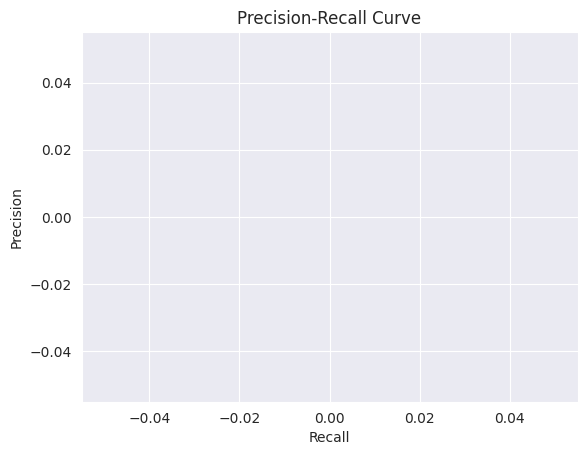

In [15]:
## IOU curve
import os
import matplotlib.pyplot as plt

# Load annotations from ground truth files
def load_annotations(annotation_folder):
    annotations = {}
    for filename in os.listdir(annotation_folder):
        if filename.endswith(".txt"):
            image_id = os.path.splitext(filename)[0]
            with open(os.path.join(annotation_folder, filename), "r") as file:
                lines = file.readlines()
                annotations[image_id] = [(float(line.split()[1]), float(line.split()[2]),
                                          float(line.split()[3]), float(line.split()[4])) for line in lines]
    return annotations

ground_truth_annotations = load_annotations("/content/drive/MyDrive/project_folder/test/labels")

# Extract predictions from images
def extract_predictions_from_images(image_folder):
    predictions = {}
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):
            image_id = os.path.splitext(filename)[0]
            # Your code to extract bounding boxes from images and store them in predictions
            # You may need need YOLO output parser
            predictions[image_id] = [(x1, y1, x2, y2) for each_prediction in predictions]  # Example format
    return predictions

yolo_predictions = extract_predictions_from_images("/content/drive/MyDrive/project_folder/annotated")

# Define IoU function
def calculate_iou(box1, box2):
    intersection_x1 = max(box1[0], box2[0])
    intersection_y1 = max(box1[1], box2[1])
    intersection_x2 = min(box1[2], box2[2])
    intersection_y2 = min(box1[3], box2[3])
    intersection_area = max(0, intersection_x2 - intersection_x1 + 1) * max(0, intersection_y2 - intersection_y1 + 1)
    box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    union_area = box1_area + box2_area - intersection_area
    iou = intersection_area / union_area
    return iou

# Compute Precision and Recall
def compute_precision_recall(ground_truth, predictions, threshold):
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    for image_id, prediction_boxes in predictions.items():
        ground_truth_boxes = ground_truth.get(image_id, [])
        for prediction_box in prediction_boxes:
            # Find the best matching ground truth annotation
            best_iou = 0
            for gt_box in ground_truth_boxes:
                iou = calculate_iou(prediction_box, gt_box)
                if iou > best_iou:
                    best_iou = iou
            # If IoU is above a certain threshold, count as true positive
            if best_iou >= threshold:
                true_positives += 1
            else:
                false_positives += 1
        false_negatives += max(0, len(ground_truth_boxes) - len(prediction_boxes))
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
    return precision, recall

# Thresholds for confidence scores
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]

# Compute precision and recall for each threshold
precisions = []
recalls = []

for threshold in thresholds:
    precision, recall = compute_precision_recall(ground_truth_annotations, yolo_predictions, threshold)
    precisions.append(precision)
    recalls.append(recall)

# Plot PR curve
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



Ground Truth Annotations: {'case_00033_380': [], 'case_00033_385': [], 'case_00033_390': [], 'case_00033_395': [], 'case_00033_400': [], 'case_00033_405': [], 'case_00033_410': [], 'case_00033_415': [], 'case_00033_420': [], 'case_00030_0': [], 'case_00030_5': [(0.7216796875, 0.466796875, 0.083984375, 0.09375)], 'case_00030_10': [(0.60546875, 0.5205078125, 0.09765625, 0.154296875), (0.71875, 0.4794921875, 0.25390625, 0.275390625)], 'case_00030_20': [(0.2998046875, 0.591796875, 0.134765625, 0.17578125), (0.6962890625, 0.5126953125, 0.388671875, 0.384765625)], 'case_00030_15': [(0.57421875, 0.5576171875, 0.05859375, 0.052734375), (0.3251953125, 0.626953125, 0.119140625, 0.1171875), (0.6962890625, 0.50390625, 0.380859375, 0.375)], 'case_00030_25': [(0.6015625, 0.3291015625, 0.11328125, 0.056640625), (0.279296875, 0.57421875, 0.12109375, 0.15625), (0.6953125, 0.501953125, 0.375, 0.37890625)], 'case_00030_30': [(0.609375, 0.3466796875, 0.09765625, 0.083984375), (0.5595703125, 0.3916015625, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Threshold: 0.5
Precision: 0.0
Recall: 0
Threshold: 0.6
Precision: 0.0
Recall: 0
Threshold: 0.7
Precision: 0.0
Recall: 0
Threshold: 0.8
Precision: 0.0
Recall: 0
Threshold: 0.9
Precision: 0.0
Recall: 0


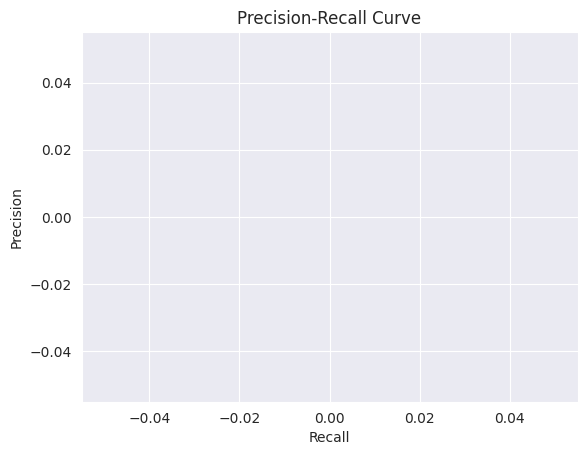

In [16]:
import os
import matplotlib.pyplot as plt

# Load annotations from ground truth files
def load_annotations(annotation_folder):
    annotations = {}
    for filename in os.listdir(annotation_folder):
        if filename.endswith(".txt"):
            image_id = os.path.splitext(filename)[0]
            with open(os.path.join(annotation_folder, filename), "r") as file:
                lines = file.readlines()
                annotations[image_id] = [(float(line.split()[1]), float(line.split()[2]),
                                          float(line.split()[3]), float(line.split()[4])) for line in lines]
    return annotations

ground_truth_annotations = load_annotations("/content/drive/MyDrive/project_folder/test/labels")
print("Ground Truth Annotations:", ground_truth_annotations)

# Extract predictions from images
def extract_predictions_from_images(image_folder):
    predictions = {}
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):
            image_id = os.path.splitext(filename)[0]
            # Your code to extract bounding boxes from images and store them in predictions
            # You may need to use image processing techniques or a YOLO output parser
            predictions[image_id] = [(x1, y1, x2, y2) for each_prediction in predictions]  # Example format
    return predictions

yolo_predictions = extract_predictions_from_images("/content/drive/MyDrive/project_folder/annotated")
print("YOLO Predictions:", yolo_predictions)

# Define IoU function
def calculate_iou(box1, box2):
    intersection_x1 = max(box1[0], box2[0])
    intersection_y1 = max(box1[1], box2[1])
    intersection_x2 = min(box1[2], box2[2])
    intersection_y2 = min(box1[3], box2[3])
    intersection_area = max(0, intersection_x2 - intersection_x1 + 1) * max(0, intersection_y2 - intersection_y1 + 1)
    box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    union_area = box1_area + box2_area - intersection_area
    iou = intersection_area / union_area
    return iou

# Compute Precision and Recall
def compute_precision_recall(ground_truth, predictions, threshold):
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    for image_id, prediction_boxes in predictions.items():
        ground_truth_boxes = ground_truth.get(image_id, [])
        for prediction_box in prediction_boxes:
            # Find the best matching ground truth annotation
            best_iou = 0
            for gt_box in ground_truth_boxes:
                iou = calculate_iou(prediction_box, gt_box)
                if iou > best_iou:
                    best_iou = iou
            # If IoU is above a certain threshold, count as true positive
            if best_iou >= threshold:
                true_positives += 1
            else:
                false_positives += 1
        false_negatives += max(0, len(ground_truth_boxes) - len(prediction_boxes))
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
    return precision, recall

# Thresholds for confidence scores
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]

# Compute precision and recall for each threshold
precisions = []
recalls = []

for threshold in thresholds:
    precision, recall = compute_precision_recall(ground_truth_annotations, yolo_predictions, threshold)
    print("Threshold:", threshold)
    print("Precision:", precision)
    print("Recall:", recall)
    precisions.append(precision)
    recalls.append(recall)

# Plot PR curve
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
